In [1]:
import re, string, unicodedata
import pandas as pd
import nltk           
                        
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

!pip install contractions
import contractions


from bs4 import BeautifulSoup                 
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords, wordnet    
from nltk.stem import LancasterStemmer, WordNetLemmatizer

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/nelsongoncalves/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/nelsongoncalves/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/nelsongoncalves/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


You should consider upgrading via the '/opt/anaconda3/bin/python -m pip install --upgrade pip' command.


In [2]:
from sklearn.feature_extraction.text import CountVectorizer         
from sklearn.feature_extraction.text import TfidfVectorizer          



In [3]:
dataset = pd.read_csv('Tweets.csv')

In [5]:
dataset.shape

(14640, 15)

In [6]:
dataset.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [7]:
data = dataset.drop(['tweet_id', 'airline_sentiment_confidence', 'negativereason', 'negativereason_confidence', 'airline', 'airline_sentiment_gold', 'name', 'negativereason_gold', 'retweet_count', 'tweet_coord', 'tweet_created', 'tweet_location', 'user_timezone'],axis=1)

In [8]:
data.head()

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...


In [10]:
data.isnull().sum(axis=0)  

airline_sentiment    0
text                 0
dtype: int64

In [12]:
pd.set_option('display.max_colwidth', None)
data.head()

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials to the experience... tacky.
2,neutral,@VirginAmerica I didn't today... Must mean I need to take another trip!
3,negative,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse"
4,negative,@VirginAmerica and it's a really big bad thing about it


In [13]:
data.shape

(14640, 2)

In [14]:
for i, row in data.iterrows():
    clean_text = re.sub(r"http\S+", "", data.at[i, 'text'])
    data.at[i,'text'] = clean_text
data.head()

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials to the experience... tacky.
2,neutral,@VirginAmerica I didn't today... Must mean I need to take another trip!
3,negative,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse"
4,negative,@VirginAmerica and it's a really big bad thing about it


In [15]:
def replace_contractions(text):
    """Replace contractions in string of text"""
    return contractions.fix(text)

for i, row in data.iterrows():
    text = data.at[i, 'text']
    clean_text = replace_contractions(text)
    data.at[i,'text'] = clean_text
data.head()

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you have added commercials to the experience... tacky.
2,neutral,@VirginAmerica I did not today... Must mean I need to take another trip!
3,negative,"@VirginAmerica it is really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse"
4,negative,@VirginAmerica and it is a really big bad thing about it


In [16]:
for i, row in data.iterrows():
    text = data.at[i, 'text']
    words = nltk.word_tokenize(text)
    data.at[i,'text'] = words
data.head()

,airline_sentiment,text
0,neutral,"[@, VirginAmerica, What, @, dhepburn, said, .]"
1,positive,"[@, VirginAmerica, plus, you, have, added, commercials, to, the, experience, ..., tacky, .]"
2,neutral,"[@, VirginAmerica, I, did, not, today, ..., Must, mean, I, need, to, take, another, trip, !]"
3,negative,"[@, VirginAmerica, it, is, really, aggressive, to, blast, obnoxious, ``, entertainment, '', in, your, guests, ', faces, &, amp, ;, they, have, little, recourse]"
4,negative,"[@, VirginAmerica, and, it, is, a, really, big, bad, thing, about, it]"


In [17]:
stopwords = stopwords.words('english')
stopwords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [18]:
def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []                       
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)        
    return new_words

In [19]:
def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []                        
    for word in words:
        new_word = word.lower()           
        new_words.append(new_word)        
    return new_words

In [20]:
def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []                        
    for word in words:
        new_word = re.sub(r'[^a-zA-z\s]', '', word)
        if new_word != '':
            new_words.append(new_word)    
    return new_words

In [21]:
def remove_stopwords(words):
    """Remove stop words from list of tokenized words"""
    new_words = []                        
    for word in words:
        if word not in stopwords:
            new_words.append(word)        
    return new_words

In [22]:
def lemmatize_verbs(words):
    """Lemmatize verbs in list of tokenized words"""
    lemmatizer = WordNetLemmatizer()
    lemmas = []                           
    for word in words:
        lemma = lemmatizer.lemmatize(word, pos='v')
        lemmas.append(lemma)              
    return lemmas

In [23]:
def normalize(words):
    words = remove_non_ascii(words)
    words = to_lowercase(words)
    words = remove_punctuation(words)
    words = remove_stopwords(words)
    words = lemmatize_verbs(words)
    return words

In [24]:
for i, row in data.iterrows():
    words = data.at[i, 'text']
    words = normalize(words)
    data.at[i,'text'] = words
data.head()

,airline_sentiment,text
0,neutral,"[virginamerica, dhepburn, say]"
1,positive,"[virginamerica, plus, add, commercials, experience, tacky]"
2,neutral,"[virginamerica, today, must, mean, need, take, another, trip]"
3,negative,"[virginamerica, really, aggressive, blast, obnoxious, ``, entertainment, guests, face, amp, little, recourse]"
4,negative,"[virginamerica, really, big, bad, thing]"


In [25]:
def listToString(text):  
    
    # initialize an empty string 
    str1 = " " 
    
    # return string   
    return (str1.join(text)) 

In [26]:
for i, row in data.iterrows():
    words = data.at[i, 'text']
    words = listToString(words)
    data.at[i,'text'] = words
data.head()

,airline_sentiment,text
0,neutral,virginamerica dhepburn say
1,positive,virginamerica plus add commercials experience tacky
2,neutral,virginamerica today must mean need take another trip
3,negative,virginamerica really aggressive blast obnoxious `` entertainment guests face amp little recourse
4,negative,virginamerica really big bad thing


In [27]:
data2 = data.copy()

In [29]:
data2.head()

,airline_sentiment,text
0,neutral,virginamerica dhepburn say
1,positive,virginamerica plus add commercials experience tacky
2,neutral,virginamerica today must mean need take another trip
3,negative,virginamerica really aggressive blast obnoxious `` entertainment guests face amp little recourse
4,negative,virginamerica really big bad thing


In [30]:

cv = CountVectorizer()  
X = cv.fit_transform(data2['text'])
print(cv.vocabulary_)
print(X.shape)
print(type(X))
print(X.toarray())

{'virginamerica': 10297, 'dhepburn': 2576, 'say': 8332, 'plus': 7338, 'add': 134, 'commercials': 1885, 'experience': 3292, 'tacky': 9305, 'today': 9653, 'must': 6308, 'mean': 5924, 'need': 6399, 'take': 9317, 'another': 475, 'trip': 9801, 'really': 7783, 'aggressive': 208, 'blast': 1066, 'obnoxious': 6725, 'entertainment': 3096, 'guests': 4186, 'face': 3337, 'amp': 409, 'little': 5559, 'recourse': 7829, 'big': 1017, 'bad': 797, 'thing': 9515, 'seriously': 8481, 'would': 10703, 'pay': 7101, 'flight': 3563, 'seat': 8409, 'play': 7302, 'fly': 3638, 'va': 10195, 'yes': 10797, 'nearly': 6395, 'every': 3202, 'time': 9600, 'vx': 10347, 'ear': 2910, 'worm': 10678, 'go': 4031, 'away': 755, 'miss': 6127, 'prime': 7524, 'opportunity': 6852, 'men': 5985, 'without': 10620, 'hat': 4280, 'parody': 7040, 'well': 10473, 'notbut': 6632, 'amaze': 367, 'arrive': 597, 'hour': 4528, 'early': 2913, 'good': 4057, 'know': 5287, 'suicide': 9152, 'second': 8420, 'lead': 5425, 'death': 2394, 'among': 406, 'teens'

In [31]:
tfidf = TfidfVectorizer()
tfs = tfidf.fit_transform(data2['text'])
import pandas as pd
print(tfidf.vocabulary_)
print(tfidf.idf_)
print(tfs.shape)
print(tfs.toarray())


{'virginamerica': 10297, 'dhepburn': 2576, 'say': 8332, 'plus': 7338, 'add': 134, 'commercials': 1885, 'experience': 3292, 'tacky': 9305, 'today': 9653, 'must': 6308, 'mean': 5924, 'need': 6399, 'take': 9317, 'another': 475, 'trip': 9801, 'really': 7783, 'aggressive': 208, 'blast': 1066, 'obnoxious': 6725, 'entertainment': 3096, 'guests': 4186, 'face': 3337, 'amp': 409, 'little': 5559, 'recourse': 7829, 'big': 1017, 'bad': 797, 'thing': 9515, 'seriously': 8481, 'would': 10703, 'pay': 7101, 'flight': 3563, 'seat': 8409, 'play': 7302, 'fly': 3638, 'va': 10195, 'yes': 10797, 'nearly': 6395, 'every': 3202, 'time': 9600, 'vx': 10347, 'ear': 2910, 'worm': 10678, 'go': 4031, 'away': 755, 'miss': 6127, 'prime': 7524, 'opportunity': 6852, 'men': 5985, 'without': 10620, 'hat': 4280, 'parody': 7040, 'well': 10473, 'notbut': 6632, 'amaze': 367, 'arrive': 597, 'hour': 4528, 'early': 2913, 'good': 4057, 'know': 5287, 'suicide': 9152, 'second': 8420, 'lead': 5425, 'death': 2394, 'among': 406, 'teens'

In [33]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
data2['airline_sentiment'] = labelencoder.fit_transform(data['airline_sentiment'])
labels = data2['airline_sentiment']

In [34]:
labels

0        1
1        2
2        1
3        0
4        0
        ..
14635    2
14636    0
14637    1
14638    0
14639    1
Name: airline_sentiment, Length: 14640, dtype: int64

In [36]:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.3, random_state=2)

In [39]:
import numpy as np  
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

forest = RandomForestClassifier(n_estimators=10, n_jobs=4)

forest = forest.fit(X_train, y_train)

print(forest)

print(np.mean(cross_val_score(forest, X, labels, cv=10)))

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=4,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)
0.7060792349726775


In [40]:
result = forest.predict(X_test)

[[2443  203   61]
 [ 449  413   86]
 [ 229  126  382]]


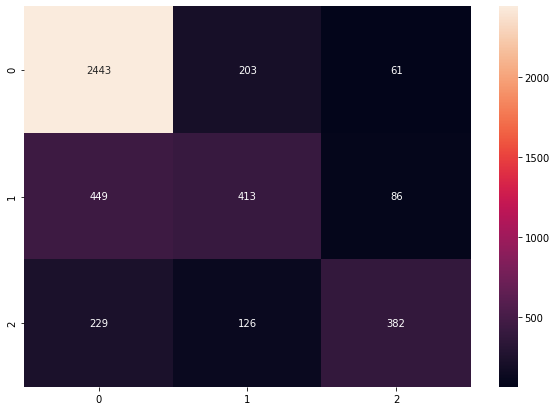

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, result)

print(conf_mat)

df_cm = pd.DataFrame(conf_mat, index = [i for i in "012"],
                  columns = [i for i in "012"])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g')

In [42]:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(tfs, labels, test_size=0.3, random_state=12)

In [43]:
import numpy as np  
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

forest = RandomForestClassifier(n_estimators=10, n_jobs=4)

forest = forest.fit(X_train, y_train)

print(forest)

print(np.mean(cross_val_score(forest, tfs, labels, cv=10)))

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=4,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)
0.7027322404371585


In [44]:
result2 = forest.predict(X_test)

[[2627  121   36]
 [ 503  324   57]
 [ 307  103  314]]


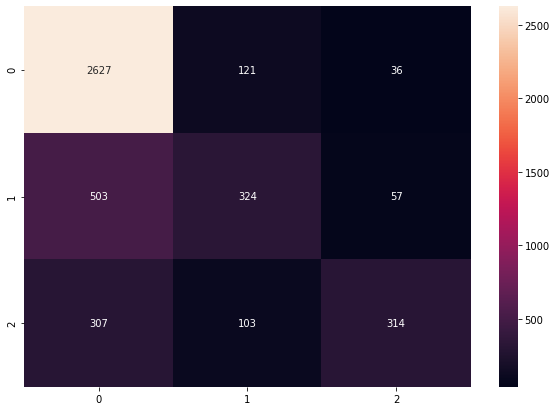

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, result2)

print(conf_mat)

df_cm = pd.DataFrame(conf_mat, index = [i for i in "012"],
                  columns = [i for i in "012"])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g')